Orginal cities {(0.78976298918281, 0.35619203512853836), (0.13214800417964107, 0.7157768269764101), (0.6495156689298002, 0.49053379816805326), (0.40709584585094316, 0.6006976086541922), (0.2514007598674001, 0.5880867610023087), (0.3954761738461074, 0.5562069427574375), (0.7392025469241156, 0.33835364510252675), (0.28447685073824425, 0.693519598966523), (0.1957969069492437, 0.39490982567923827), (0.7133292420727545, 0.5300153772688012), (0.12504228424177127, 0.556280975818943), (0.3524603039051298, 0.566752192239981), (0.4793210045212862, 0.6726414923897015), (0.1919696161843764, 0.6362893584511818), (0.8602696998116859, 0.43254960606210335), (0.7384634062166825, 0.5361462577535753), (0.33776735604382746, 0.5689290051498059), (0.905268790996696, 0.312080277040808), (0.37329340327377597, 0.48533295521012354), (0.7062781535281957, 0.45587797008013553), (0.650641679994368, 0.5004860968677808), (0.8309826532600587, 0.4035466506951879), (0.1502239361992339, 0.47809191907844995), (0.145032454

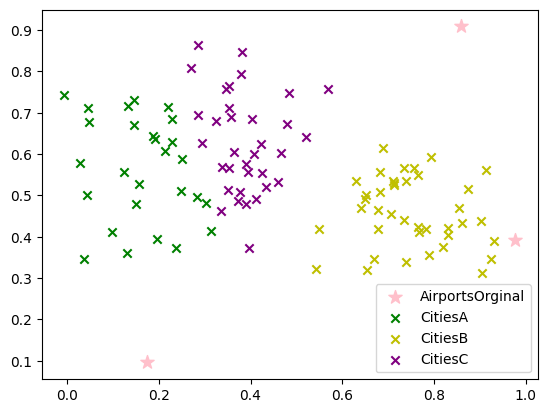

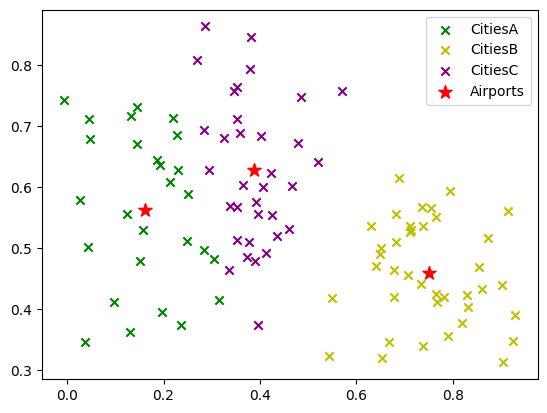

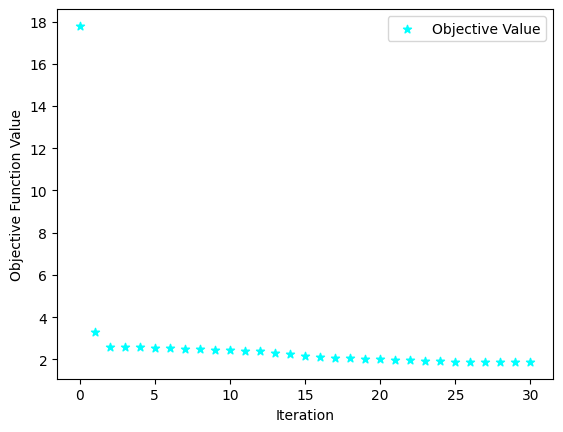

In [8]:
import math
import random
import numpy as np


def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)


#Calculates the objective funciton value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance


num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
#sigma = 0.01
#sigma = 0.05
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))


#Create set of cities for closest airport
cityA = set()
cityB = set()
cityC = set()

closeCityList = []
closeCityList.append(cityA)
closeCityList.append(cityB)
closeCityList.append(cityC)

#findClosestCity(cities, airports, cityA, cityB, cityC)
#val = objectiveFunct(closeCityList, airports)
#print('obj val: ', val)

#Array of the objective values calculated
objVals = []
prevObjVal = 10000

#Hold orginal airport locations
temp1 = airports[0]
temp2 = airports[1]
temp3 = airports[2]
airportOrgin = []
airportOrgin.append(temp1)
airportOrgin.append(temp2)
airportOrgin.append(temp3)


#Check the objective function value changes
change = 10
iteration = 0

print('Orginal cities', cities)
print('Orginal airports: ', airports)

#Repeat objective function till minimal change
while (change > 0.0001):

    #Group together cities closest to a specific airport
    findClosestCity(cities, airports, cityA, cityB, cityC)
    print('length of cityA', len(cityA))

    #Calculate objective function value
    val = objectiveFunct(closeCityList, airports)
    objVals.append((iteration, val))
    iteration = iteration + 1

    #Check to see if converge to solution
    change = abs(val - prevObjVal)
    prevObjVal = val

    #For each airport
    for i in range(len(airports)):
        airportXCord = airports[i][0]
        airportYCord = airports[i][1]

        #Calculate summations for each individual city and individual axis
        summationX = 0
        summationY = 0

        #For each city closest to a particular airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            summationX = summationX + (airportXCord - cityXCord)
            summationY = summationY + (airportYCord - cityYCord)

        #After completing summations, multiply by 2 for partial derivatives
        gradientX = summationX * 2
        gradientY = summationY * 2
        #print('PREgradients for airport ', i , ' ', gradientX, gradientY)

        #Multiply with small constant
        gradientX = gradientX * 0.01    #sigma
        gradientY = gradientY * 0.01    #sigma

        #Possible Test
        #gradientX = airportXCord * gradientX
        #gradientY = airportYCord * gradientY

        print('gradients for airport ', i , ' ', gradientX, gradientY)
        #airports[i] = (gradientX, gradientX)

        #Update location of airport
        newLocX = airportXCord - gradientX
        newLocY = airportYCord - gradientY
        airports[i] = (newLocX, newLocY)

    print('airports: ', airports)


    #if(iteration == 10):
        #change = 0



findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print(val)


print ('final airport cords', airports)
print('final cities:',cities)
print('cityA: ', cityA)
print('cityB: ', cityB)
print('cityC: ', cityC)

#for i in range(len(airports)):
    #tempX = round(airports[i][0], 5)
    #tempY = round(airports[i][1], 5)
    #airports[i] = (tempX, tempY)

#print ('final airport cords', airports)

import matplotlib.pyplot as plt


#Orginal state
plt.figure(3)
zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
plt.legend()

#Plot figure for locations
plt.figure(1)
zip_citiesA = zip(*cityA)
plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

#zip_airsOrgin = zip(*airportOrgin)
#plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')
#plt.scatter(airports[0][0], airports[0][1], marker='*', color='blue', s=100, label='AirportsA')
plt.legend()


#Plot figure for objective values
plt.figure(2)
zip_objFuncVal = zip(*objVals)
plt.scatter(*zip_objFuncVal, marker='*',color='cyan', label='Objective Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')


plt.legend()
